In [1]:
from datagenerator import ImageDataGenerator
import tensorflow as tf
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline
import time

[1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1]


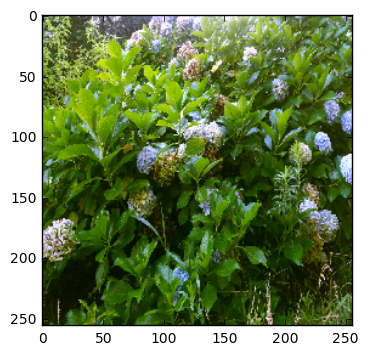

In [2]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    train_dataGenerator = ImageDataGenerator(
        csv_path='../../Species/data/train_labels.csv', 
        file_path='../../Species/data/train/', 
        image_format='jpg', 
        num_epochs=None, 
        session=sess, 
        batch_size = 32,
        shuffle=True, 
        name_scope='Input_pipeline-train')
    
    #print(train_dataGenerator.file_path)
    #print(train_dataGenerator.filenames)
    #print(train_dataGenerator.labels)
    #print(train_dataGenerator.input_data)
    # TensorBoard Summary 작성
    summaryWriter = tf.summary.FileWriter('../Species/log', graph=tf.get_default_graph())
    
    # Thread 관리
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    train_data, train_label = train_dataGenerator.next_batch()#sess.run(train_dataGenerator.input_data)
    print(train_label)
    img = Image.fromarray(train_data[0], 'RGB')
    imshow(img)
    
    coord.request_stop()
    coord.join(threads)